<a href="https://colab.research.google.com/github/Shin72111/learn-ml-dl/blob/master/linkedin/face-recognition/Ch03/face_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### To run the colab, the people.jpg need to be uploaded to /tmp directory.
[people.jpg](https://github.com/Shin72111/learn-ml-dl/blob/master/linkedin/face-recognition/Ch03/people.jpg)


##### Add PIL library to show the result image

In [0]:
import PIL.Image
import PIL.ImageDraw

##### Cannot import face-recognition library, so copy the needded code after inspecting the library

In [0]:
import numpy as np
import dlib

# Load image to a numpy array
def load_image_file(file, mode='RGB'):
  """
  Loads an image file (.jpg, .png, etc) into a numpy array
  :param file: image file name or file object to load
  :param mode: format to convert the image to. Only 'RGB' (8-bit RGB, 3 channels) and 'L' (black and white) are supported.
  :return: image contents as numpy array
  """
  im = PIL.Image.open(file)
  if mode:
      im = im.convert(mode)
  return np.array(im)
  
def _rect_to_css(rect):
  """
  Convert a dlib 'rect' object to a plain tuple in (top, right, bottom, left) order
  :param rect: a dlib 'rect' object
  :return: a plain tuple representation of the rect in (top, right, bottom, left) order
  """
  return rect.top(), rect.right(), rect.bottom(), rect.left()  
  
def _trim_css_to_bounds(css, image_shape):
  return max(css[0], 0), min(css[1], image_shape[1]), min(css[2], image_shape[0]), max(css[3], 0)


# Locate the face
def face_locations(img, number_of_times_to_upsample=1):
  face_detector = dlib.get_frontal_face_detector()
  return [_trim_css_to_bounds(_rect_to_css(face), img.shape) for face in face_detector(img, number_of_times_to_upsample)]

In [0]:
# Load the image into a numpy array
image = load_image_file('/tmp/people.jpg')

In [6]:
# Find all the faces in the image
face_locs = face_locations(image)

print(f'I found {len(face_locs)} face(s) in the photograph')


I found 6 face(s) in the photograph


In [0]:
# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

In [8]:
for face_location in face_locs:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print(f'A face is located at pixel location Top: {top}, Left: {left}, Bottom: {bottom}, Right: {right}')

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
pil_image.show()

A face is located at pixel location Top: 163, Left: 497, Bottom: 271, Right: 605
A face is located at pixel location Top: 186, Left: 275, Bottom: 275, Right: 364
A face is located at pixel location Top: 211, Left: 67, Bottom: 319, Right: 175
A face is located at pixel location Top: 295, Left: 653, Bottom: 402, Right: 760
A face is located at pixel location Top: 271, Left: 366, Bottom: 378, Right: 474
A face is located at pixel location Top: 152, Left: 724, Bottom: 259, Right: 832


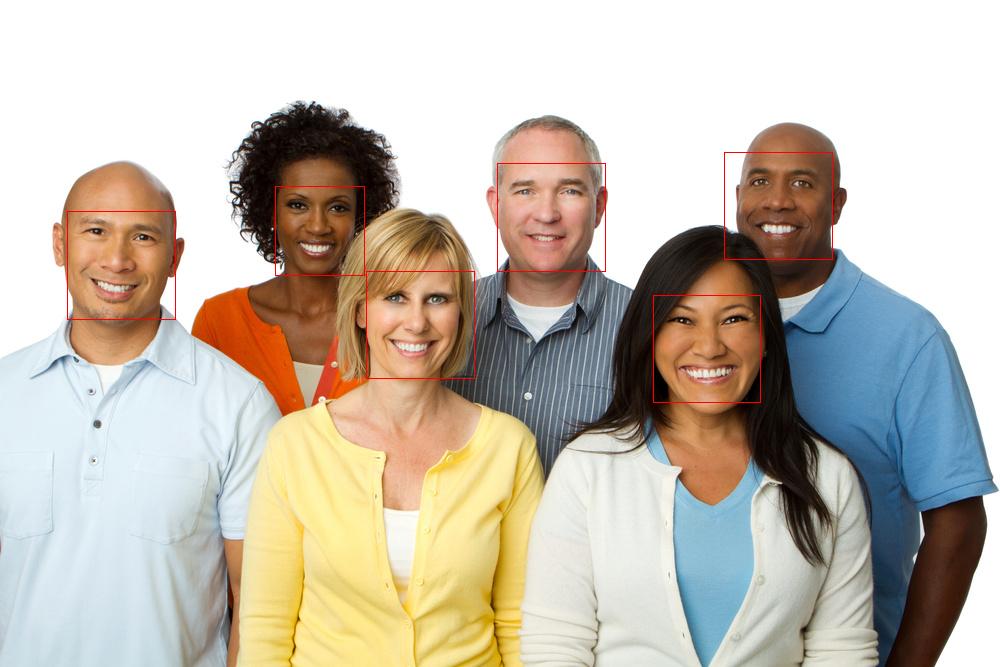

In [12]:
# Workaround to show image on Google colab
from IPython.core.display import display
display(pil_image)